### An exercise about observational astrnomy: a gamma-ray burst with an associated supernova

In [90]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u

In [11]:
file = '101219Bdata/MS_UVB_1D.fits'

In [12]:
fits.getheader(file)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 7278                                                  
EXTEND  =                    T                                                  
CRPIX1  =                  1.0                                                  
CDELT1  =                 0.04                                                  
CRVAL1  =               298.92                                                  
CRPIX2  =                  1.0                                                  
CDELT2  =                 0.16                                                  
CRVAL2  =    -10.1800003051758                                                  
DATE    = '2011-03-13T13:03:18'                                                 
CTYPE1  = 'LINEAR  '        

In [72]:
# List of FITS file paths

files = [
    '101219Bdata/MS_UVB_1D.fits',
    '101219Bdata/MS_VIS_1D.fits',
    '101219Bdata/NIR_phys_stare_rec_1.fits',
    '101219Bdata/UVB_phys_stare_rec_2.fits',
    '101219Bdata/VIS_phys_stare_rec_2.fits',
    '101219Bdata/NIR_phys_stare_rec_2.fits',
    '101219Bdata/UVB_phys_stare_rec_3.fits',
    '101219Bdata/VIS_phys_stare_rec_3.fits',
    '101219Bdata/MS_UVB_1D.fits' #just to fill the empty slot
]

# Read the FITS files and store the data in a 3x3 array
data_array = np.empty((3, 3), dtype=object)
for i in range(3):
    for j in range(3):
        with fits.open(files[i*3 + j]) as hdul:
            data_array[i, j] = hdul[0].data


In [73]:
print(data_array.shape)


(3, 3)


In [74]:
print(data_array[0][0] == fits.getdata(files[0]))
print(data_array[0][1] == fits.getdata(files[1]))
print(data_array[2][1] == fits.getdata(files[7]))

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


In [75]:
print(data_array[0][0].shape)

(7278,)


In [76]:
fits.getheader(files[0])

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 7278                                                  
EXTEND  =                    T                                                  
CRPIX1  =                  1.0                                                  
CDELT1  =                 0.04                                                  
CRVAL1  =               298.92                                                  
CRPIX2  =                  1.0                                                  
CDELT2  =                 0.16                                                  
CRVAL2  =    -10.1800003051758                                                  
DATE    = '2011-03-13T13:03:18'                                                 
CTYPE1  = 'LINEAR  '        

In [77]:
# Convert the array to a pandas DataFrame
df = pd.DataFrame(data_array)

In [78]:
# Define column and row names
column_names = ['UVB', 'VIS', 'NIR']
row_names = ['epoch1', 'epoch2', 'epoch3']

# Assign names to columns and rows
df.columns = column_names
df.index = row_names

In [79]:
df

,UVB,VIS,NIR
epoch1,"[3.740918301043186e-14, -1.8777759905265652e-1...","[-1.7289476599534337e-13, 1.586385475836182e-1...","[1.9790901e-16, 4.4328916e-16, 7.897391e-16, 9..."
epoch2,"[4.6382482e-15, -1.566297e-15, -2.9859798e-15,...","[2.8467656e-17, 4.7119993e-17, 5.5481174e-17, ...","[1.14786e-16, 2.3273435e-16, 3.8656506e-16, 5...."
epoch3,"[1.4686584e-14, -9.65493e-15, -2.5524403e-14, ...","[-3.8304908e-17, -3.408053e-17, 3.1483662e-17,...","[3.740918301043186e-14, -1.8777759905265652e-1..."


In [80]:
# check the data length

for i in range(3):
    for j in range(3):
        print(data_array[i][j].shape)

(7278,)
(12159,)
(29701,)
(14845,)
(24457,)
(29701,)
(14845,)
(24457,)
(7278,)


In [81]:
# array of wavelengths: lambda = CRVAL1 + i * CDELT1
# for the first file
CDELT1  =                 0.04                                                  
CRVAL1  =               298.92

wavelength = CRVAL1 + np.arange(data_array[0][0].shape[0]) * CDELT1
print(wavelength[:4])

[298.92 298.96 299.   299.04]


(-5e-18, 5e-17)

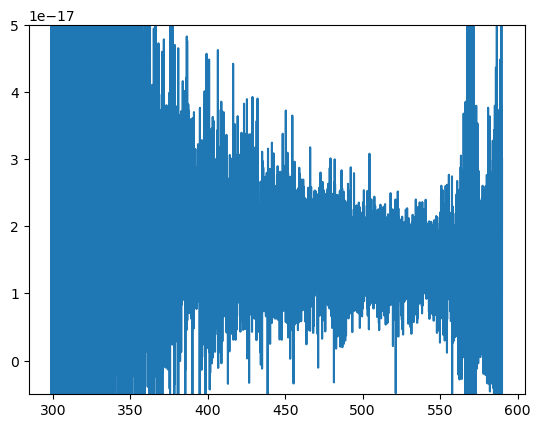

In [82]:
# plot

plt.plot(wavelength, data_array[0][0])
plt.ylim((-0.5e-17,5e-17))

In [91]:
wavelengths = np.zeros((3, 3), dtype=object)

# read CRVAL1 and CDELT1 from the headers
for i in range(3): 
    for j in range(3):
        with fits.open(files[i*3 + j]) as hdul:
            CRVAL1 = hdul[0].header['CRVAL1']
            CDELT1 = hdul[0].header['CDELT1']
            wavelengths[i, j] = CRVAL1 + np.arange(data_array[i][j].shape[0]) * CDELT1
            # convert from nm to angstroms
            wavelengths[i, j] *= 10
            # units of angstroms
            wavelengths[i, j] = wavelengths[i, j] * u.AA
            

print(wavelengths[0, 0][:4])
print(wavelengths[0, 1][:4])
print(wavelengths[0, 2][:4])
print(wavelengths[0, 0].shape) #uvb
print(wavelengths[0, 1].shape) #vis
print(wavelengths[0, 2].shape) #nir

[2989.2 2989.6 2990.  2990.4] Angstrom
[5336.8 5337.2 5337.6 5338. ] Angstrom
[9940.  9940.5 9941.  9941.5] Angstrom
(7278,)
(12159,)
(29701,)


#### Plot the observed flux (in units of erg s-1 cm-2 Å-1) as a function of wavelength (in Å) for epoch 1,2 and 3. Make one matplotlib panel for each epoch.

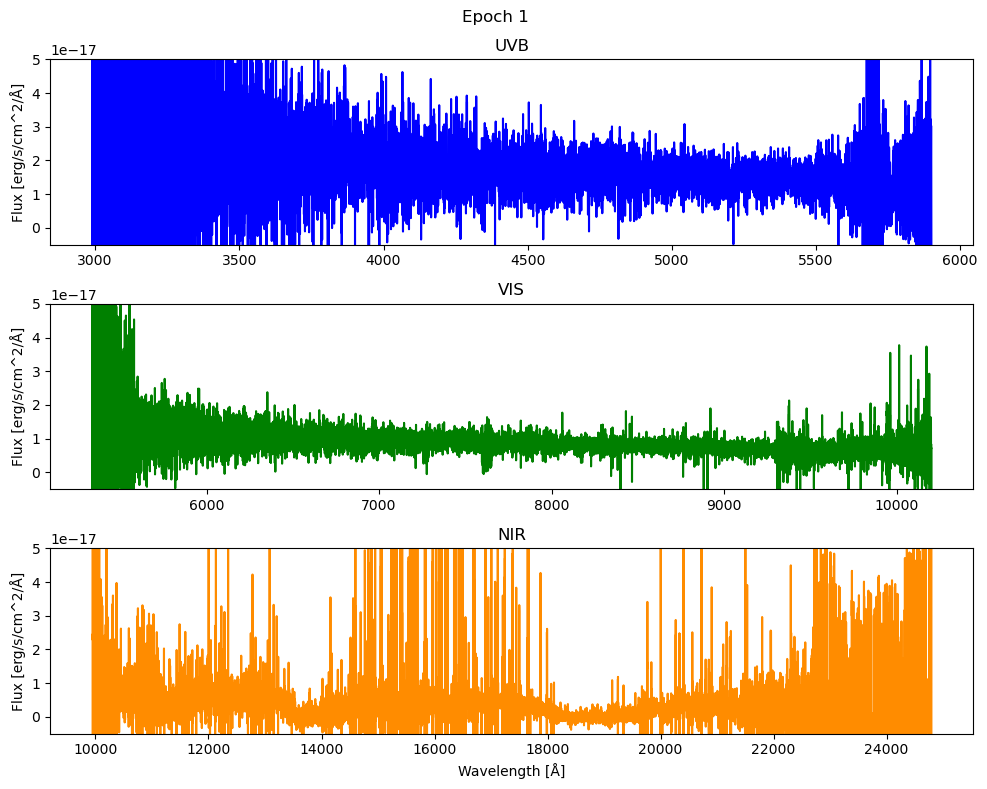

In [103]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

ax[0].plot(wavelengths[0, 0], data_array[0, 0],color='blue')
ax[1].plot(wavelengths[0, 1], data_array[0, 1],color='green')
ax[2].plot(wavelengths[0, 2], data_array[0, 2],color='darkorange')
for i in range(3):
    ax[i].set_title(column_names[i])
    ax[i].set_ylim((-0.5e-17, 5e-17))
    ax[i].set_ylabel('Flux [erg/s/cm^2/Å]')
ax[2].set_xlabel('Wavelength [Å]')
plt.suptitle('Epoch 1')
plt.tight_layout()

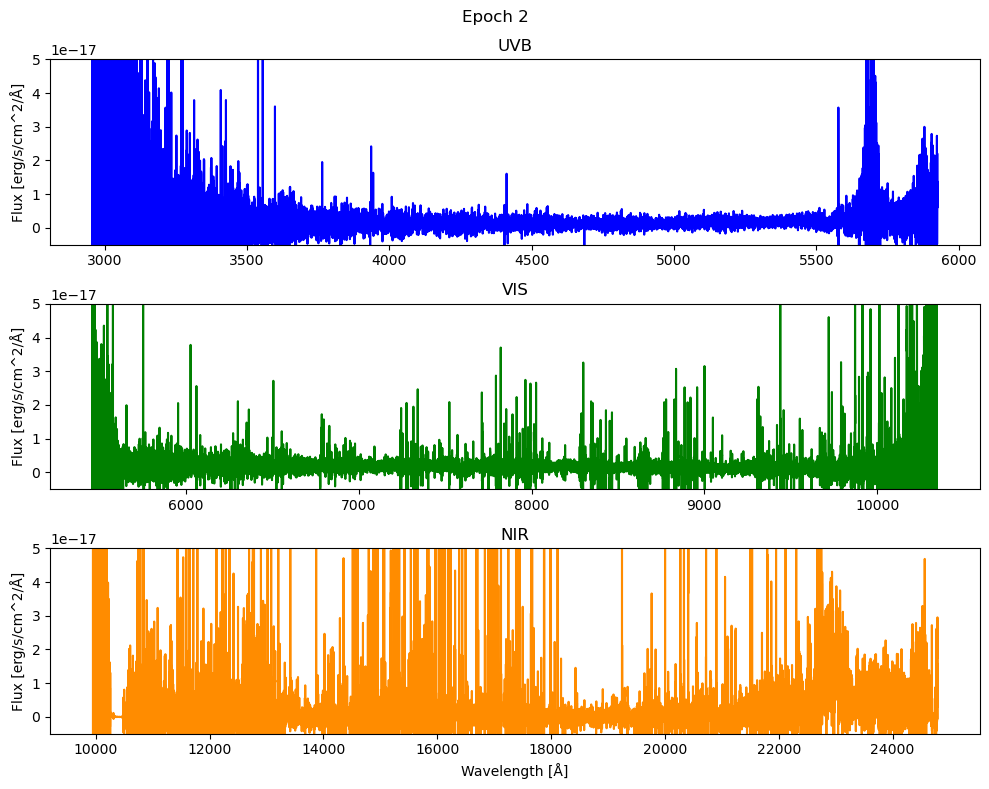

In [105]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

ax[0].plot(wavelengths[1, 0], data_array[1, 0],color='blue')
ax[1].plot(wavelengths[1, 1], data_array[1, 1],color='green')
ax[2].plot(wavelengths[1, 2], data_array[1, 2],color='darkorange')
for i in range(3):
    ax[i].set_title(column_names[i])
    ax[i].set_ylim((-0.5e-17, 5e-17))
    ax[i].set_ylabel('Flux [erg/s/cm^2/Å]')
ax[2].set_xlabel('Wavelength [Å]')
plt.suptitle('Epoch 2')
plt.tight_layout()

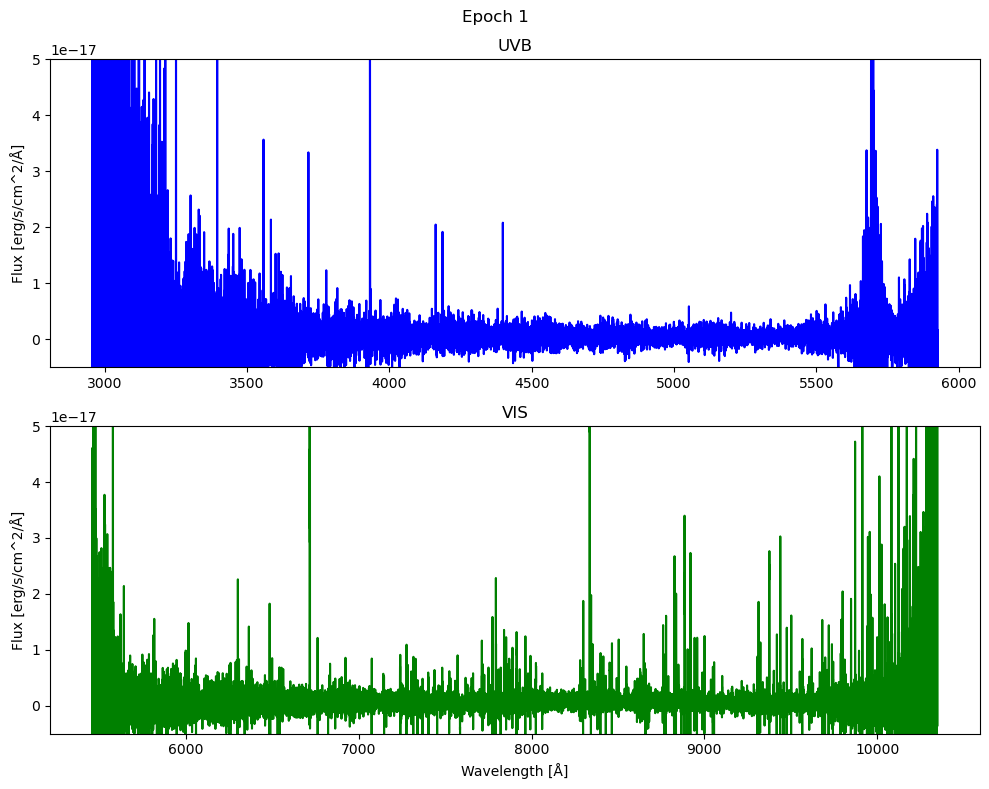

In [108]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(wavelengths[2, 0], data_array[2, 0],color='blue')
ax[1].plot(wavelengths[2, 1], data_array[2, 1],color='green')
for i in range(2):
    ax[i].set_title(column_names[i])
    ax[i].set_ylim((-0.5e-17, 5e-17))
    ax[i].set_ylabel('Flux [erg/s/cm^2/Å]')
ax[1].set_xlabel('Wavelength [Å]')
plt.suptitle('Epoch 1')
plt.tight_layout()

#### The data is relatively noisy. Rebin the data by a factor of 5, by calculating the median wavelength and flux, for each set of 5 pixels. Replot the data. The following commands can be used to rebin the data
